In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 학습 모델 저장을 위한 라이브러리
import pickle

In [2]:
df1 = pd.read_parquet('data/train/5.잔액정보/201807_train_.parquet')
df2 = pd.read_parquet(r'data/train/5.잔액정보/201808_train_.parquet')
df3 = pd.read_parquet(r'data/train/5.잔액정보/201809_train_.parquet')
df4 = pd.read_parquet(r'data/train/5.잔액정보/201810_train_.parquet')
df5 = pd.read_parquet(r'data/train/5.잔액정보/201811_train_.parquet')
df6 = pd.read_parquet(r'data/train/5.잔액정보/201812_train_.parquet')

In [3]:
target1=pd.read_parquet(r'data/train/1.회원정보/201807_train_.parquet')
target2=pd.read_parquet(r'data/train/1.회원정보/201808_train_.parquet')
target3=pd.read_parquet(r'data/train/1.회원정보/201809_train_.parquet')
target4=pd.read_parquet(r'data/train/1.회원정보/201810_train_.parquet')
target5=pd.read_parquet(r'data/train/1.회원정보/201811_train_.parquet')
target6=pd.read_parquet(r'data/train/1.회원정보/201812_train_.parquet')

In [4]:
tg_df = pd.concat([target1['Segment'], target2['Segment'], target3['Segment'], target4['Segment'], target5['Segment'], target6['Segment']])
tg_df.reset_index(inplace=True, drop=True)
tg_df

0          D
1          E
2          C
3          D
4          E
          ..
2399995    E
2399996    D
2399997    C
2399998    E
2399999    E
Name: Segment, Length: 2400000, dtype: object

In [5]:
all_df = pd.concat([df1, df2, df3, df4, df5, df6])
all_df.reset_index(inplace=True, drop=True)
all_df

,기준년월,ID,잔액_일시불_B0M,잔액_할부_B0M,잔액_현금서비스_B0M,잔액_리볼빙일시불이월_B0M,잔액_리볼빙CA이월_B0M,잔액_카드론_B0M,월중평잔_일시불_B0M,월중평잔_할부_B0M,...,평잔_6M,평잔_일시불_6M,평잔_일시불_해외_6M,평잔_RV일시불_6M,평잔_RV일시불_해외_6M,평잔_할부_6M,평잔_할부_해외_6M,평잔_CA_6M,평잔_CA_해외_6M,평잔_카드론_6M
0,201807,TRAIN_000000,998,962,22971,0,0,0,1084,547,...,15988,2440,0,0,0,572,0,17008,0,0
1,201807,TRAIN_000001,2565,2390,0,0,0,0,4090,2553,...,7045,2677,0,2830,0,2736,0,0,0,0
2,201807,TRAIN_000002,5312,5113,21531,6795,0,0,5006,8778,...,66549,9118,0,8870,0,4429,0,43351,0,0
3,201807,TRAIN_000003,730,5025,26284,0,0,0,487,5607,...,30139,884,0,0,0,5097,0,30697,0,0
4,201807,TRAIN_000004,0,0,0,0,0,0,0,0,...,28,21,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2399996,201812,TRAIN_399996,3351,0,0,0,0,27337,4412,0,...,67826,12524,0,0,0,0,0,0,0,23031
2399997,201812,TRAIN_399997,2524,2960,0,0,0,0,2694,3374,...,8627,3241,0,0,0,3995,0,0,0,0
2399998,201812,TRAIN_399998,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
all_df['Segment'] = tg_df

In [7]:
all_df

,기준년월,ID,잔액_일시불_B0M,잔액_할부_B0M,잔액_현금서비스_B0M,잔액_리볼빙일시불이월_B0M,잔액_리볼빙CA이월_B0M,잔액_카드론_B0M,월중평잔_일시불_B0M,월중평잔_할부_B0M,...,평잔_일시불_6M,평잔_일시불_해외_6M,평잔_RV일시불_6M,평잔_RV일시불_해외_6M,평잔_할부_6M,평잔_할부_해외_6M,평잔_CA_6M,평잔_CA_해외_6M,평잔_카드론_6M,Segment
0,201807,TRAIN_000000,998,962,22971,0,0,0,1084,547,...,2440,0,0,0,572,0,17008,0,0,D
1,201807,TRAIN_000001,2565,2390,0,0,0,0,4090,2553,...,2677,0,2830,0,2736,0,0,0,0,E
2,201807,TRAIN_000002,5312,5113,21531,6795,0,0,5006,8778,...,9118,0,8870,0,4429,0,43351,0,0,C
3,201807,TRAIN_000003,730,5025,26284,0,0,0,487,5607,...,884,0,0,0,5097,0,30697,0,0,D
4,201807,TRAIN_000004,0,0,0,0,0,0,0,0,...,21,0,0,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2399996,201812,TRAIN_399996,3351,0,0,0,0,27337,4412,0,...,12524,0,0,0,0,0,0,0,23031,D
2399997,201812,TRAIN_399997,2524,2960,0,0,0,0,2694,3374,...,3241,0,0,0,3995,0,0,0,0,C
2399998,201812,TRAIN_399998,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E


In [8]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, f_oneway

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

def eta_squared(anova_ss_between, total_ss):
    return anova_ss_between / total_ss if total_ss != 0 else np.nan

# 수치형/범주형 자동 구분
num_cols = all_df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = all_df.select_dtypes(exclude=[np.number]).columns.tolist()

anova = []
chi = []

for col in all_df.columns:
    if col == 'Segment':
        continue

    if col in num_cols:
        data = all_df[[col, 'Segment']].dropna()
        groups = [data[data['Segment'] == val][col] for val in data['Segment'].unique()]
        try:
            stat = f_oneway(*groups).statistic
            ss_between = sum([(g.mean() - data[col].mean())**2 * len(g) for g in groups])
            ss_total = sum((data[col] - data[col].mean())**2)
            eta2 = eta_squared(ss_between, ss_total)
            anova.append({'변수': col, '유형': '수치형', '계수종류': 'Eta²', '상관계수': eta2})
        except:
            continue

    elif col in cat_cols:
        contingency = pd.crosstab(all_df[col], all_df['Segment'])
        if contingency.shape[0] > 1 and contingency.shape[1] > 1:
            try:
                v = cramers_v(contingency)
                chi.append({'변수': col, '유형': '범주형', '계수종류': "Cramér's V", '상관계수': v})
            except:
                continue

# 결과 정리
result_df1 = pd.DataFrame(anova)
result_df2 = pd.DataFrame(chi)
result_df1 = result_df1.sort_values(by='상관계수', ascending=False).reset_index(drop=True)
result_df2 = result_df2.sort_values(by='상관계수', ascending=False).reset_index(drop=True)

# 결과 출력
display(result_df1)
display(result_df2)

,변수,유형,계수종류,상관계수
0,평잔_일시불_6M,수치형,Eta²,0.201487
1,월중평잔_일시불_B0M,수치형,Eta²,0.197876
2,월중평잔_일시불,수치형,Eta²,0.195245
3,평잔_일시불_3M,수치형,Eta²,0.189394
4,잔액_일시불_B0M,수치형,Eta²,0.174591
...,...,...,...,...
76,RV잔액이월횟수_R3M,수치형,Eta²,NaN
77,연체잔액_일시불_해외_B0M,수치형,Eta²,NaN
78,연체잔액_RV일시불_해외_B0M,수치형,Eta²,NaN
79,연체잔액_할부_해외_B0M,수치형,Eta²,NaN


,변수,유형,계수종류,상관계수
0,ID,범주형,Cramér's V,1.0


In [10]:
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.5f}'.format)
display(result_df1)
display(result_df2)

,변수,유형,계수종류,상관계수
0,평잔_일시불_6M,수치형,Eta²,0.20149
1,월중평잔_일시불_B0M,수치형,Eta²,0.19788
2,월중평잔_일시불,수치형,Eta²,0.19525
3,평잔_일시불_3M,수치형,Eta²,0.18939
4,잔액_일시불_B0M,수치형,Eta²,0.17459
5,잔액_일시불_B1M,수치형,Eta²,0.14079
6,잔액_일시불_B2M,수치형,Eta²,0.14029
7,평잔_일시불_해외_6M,수치형,Eta²,0.10028
8,평잔_일시불_해외_3M,수치형,Eta²,0.08667
9,월중평잔,수치형,Eta²,0.08284


,변수,유형,계수종류,상관계수
0,ID,범주형,Cramér's V,1.00000


In [19]:
with pd.ExcelWriter('5.잔액정보.xlsx', engine='openpyxl') as writer:
    result_df1.to_excel(writer, sheet_name='Result1', index=False)
    result_df2.to_excel(writer, sheet_name='Result2', index=False)


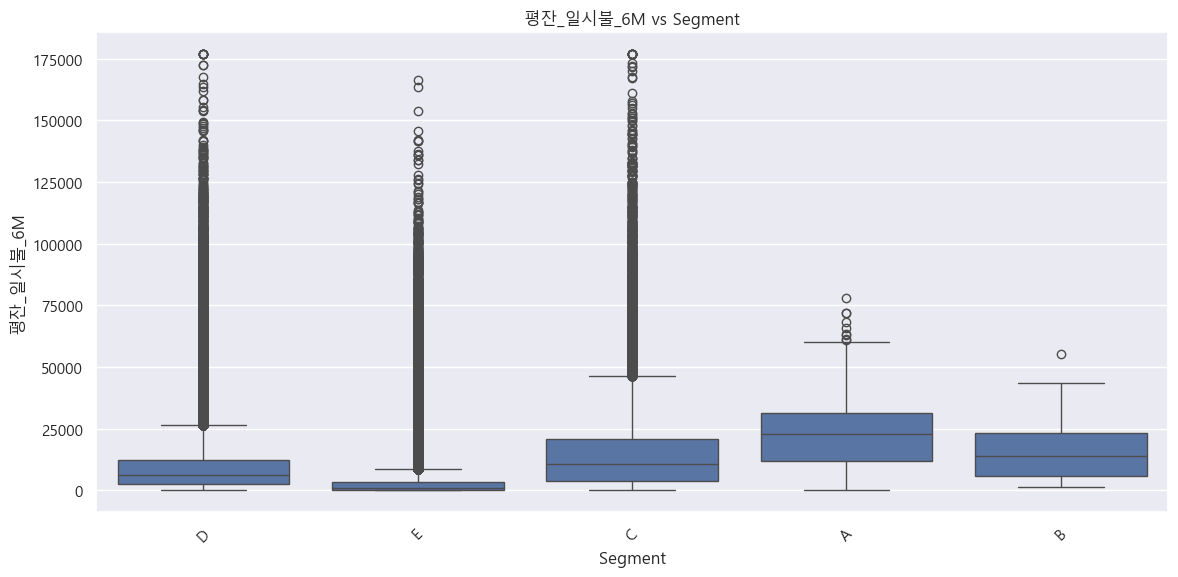

In [11]:
col = '평잔_일시불_6M'

if pd.api.types.is_numeric_dtype(all_df[col]):
    sns.boxplot(data=all_df, x='Segment', y=col)
else:
    sns.countplot(data=all_df, x=col, hue='Segment', order=all_df[col].value_counts().index)

plt.title(f"{col} vs Segment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

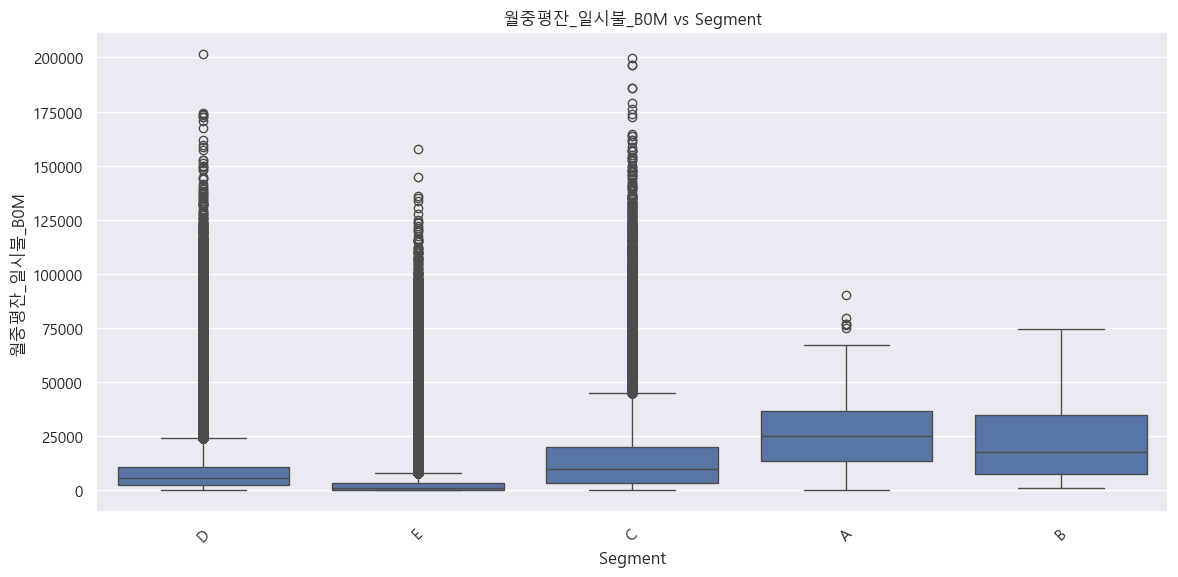

In [13]:
col = '월중평잔_일시불_B0M'

if pd.api.types.is_numeric_dtype(all_df[col]):
    sns.boxplot(data=all_df, x='Segment', y=col)
else:
    sns.countplot(data=all_df, x=col, hue='Segment', order=all_df[col].value_counts().index)

plt.title(f"{col} vs Segment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

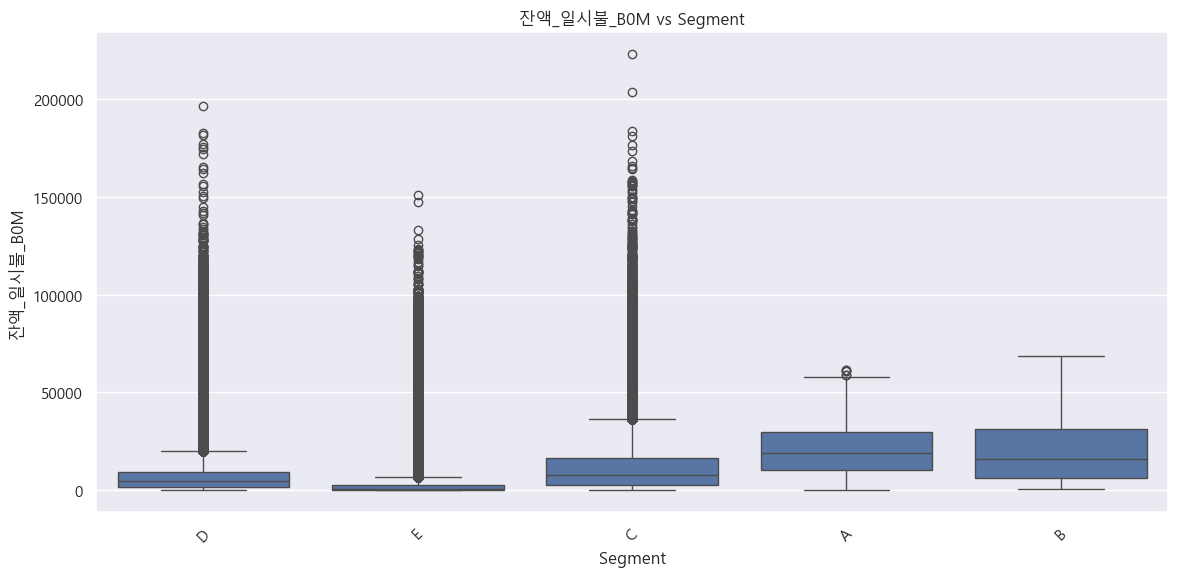

In [14]:
col = '잔액_일시불_B0M'

if pd.api.types.is_numeric_dtype(all_df[col]):
    sns.boxplot(data=all_df, x='Segment', y=col)
else:
    sns.countplot(data=all_df, x=col, hue='Segment', order=all_df[col].value_counts().index)

plt.title(f"{col} vs Segment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

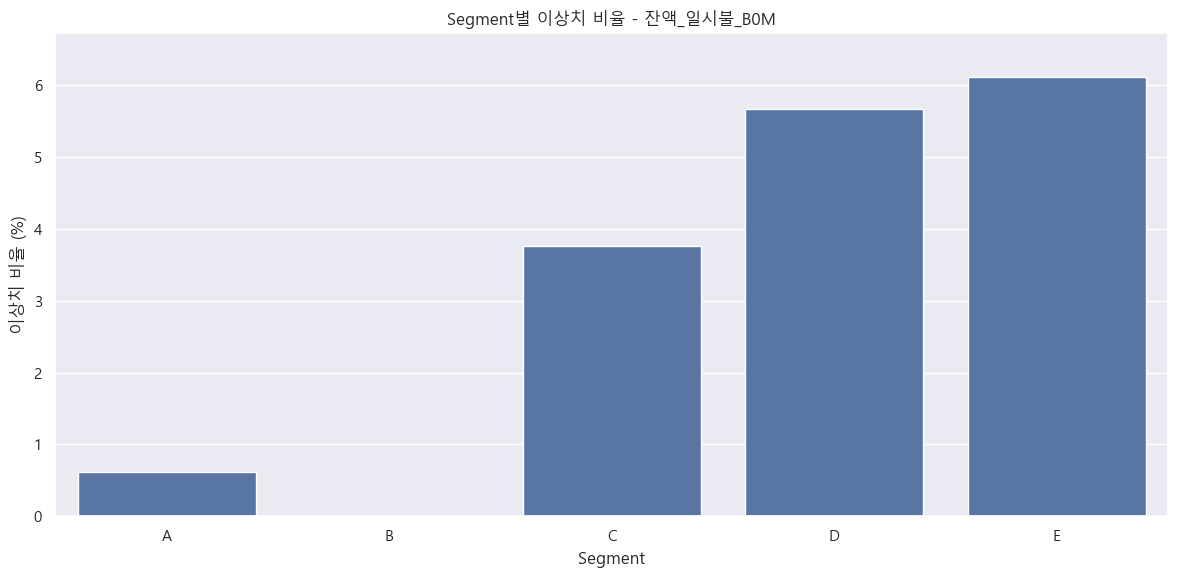

In [15]:
# 대상 변수
col = '잔액_일시불_B0M'

# 이상치 비율 계산 함수
def get_outlier_ratio(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return len(outliers) / len(df)

# Segment별 이상치 비율 계산
outlier_ratios = (
    all_df.groupby('Segment')
    .apply(lambda group: get_outlier_ratio(group, col))
    .reset_index(name='이상치비율')
)

# 비율(%)로 변환
outlier_ratios['이상치비율'] *= 100

# 시각화
sns.barplot(data=outlier_ratios, x='Segment', y='이상치비율')
plt.title(f"Segment별 이상치 비율 - {col}")
plt.ylabel("이상치 비율 (%)")
plt.ylim(0, outlier_ratios['이상치비율'].max() * 1.1)
plt.tight_layout()
plt.show()

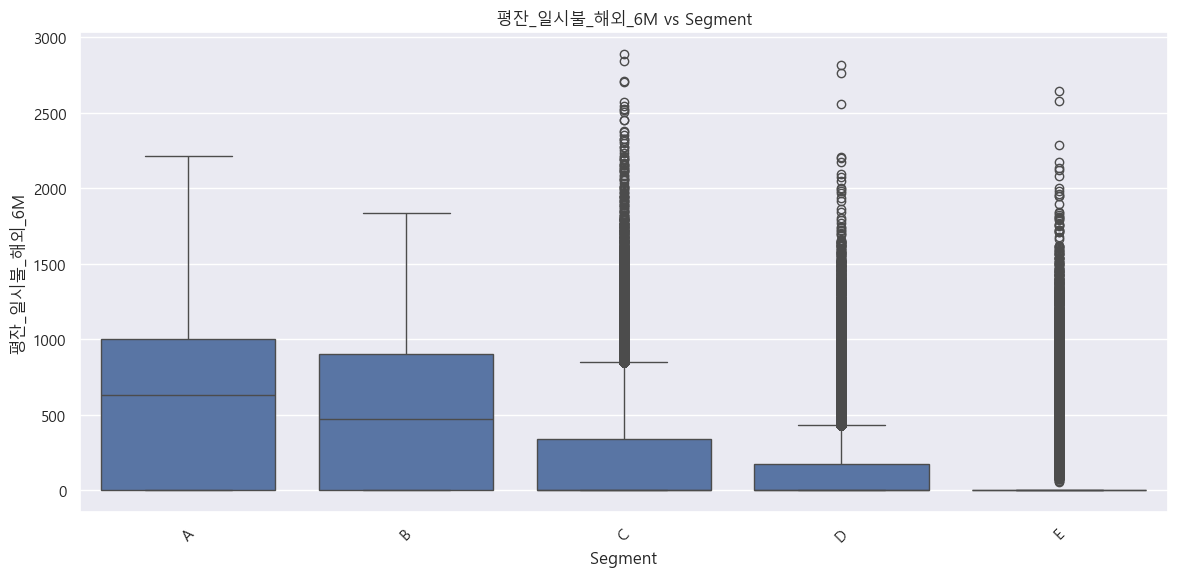

In [18]:
col = '평잔_일시불_해외_6M'

if pd.api.types.is_numeric_dtype(all_df[col]):
    sns.boxplot(data=all_df, x='Segment', y=col, order=['A', 'B', 'C', 'D', 'E'])
else:
    sns.countplot(data=all_df, x=col, hue='Segment', order=all_df[col].value_counts().index)

plt.title(f"{col} vs Segment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


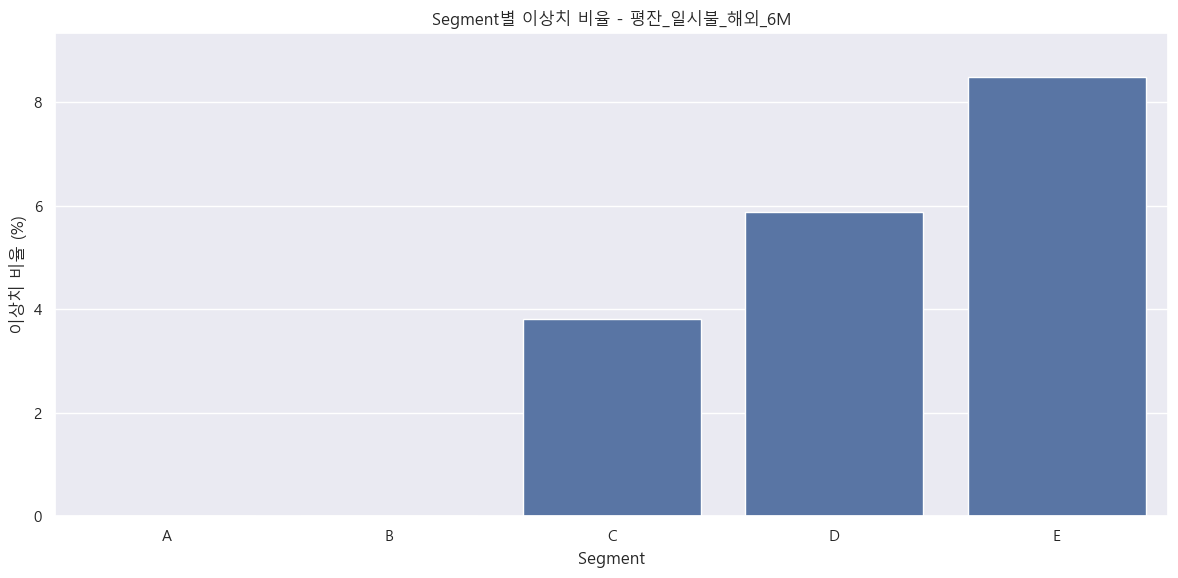

In [17]:
# 대상 변수
col = '평잔_일시불_해외_6M'

# 이상치 비율 계산 함수
def get_outlier_ratio(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return len(outliers) / len(df)

# Segment별 이상치 비율 계산
outlier_ratios = (
    all_df.groupby('Segment')
    .apply(lambda group: get_outlier_ratio(group, col))
    .reset_index(name='이상치비율')
)

# 비율(%)로 변환
outlier_ratios['이상치비율'] *= 100

# 시각화
sns.barplot(data=outlier_ratios, x='Segment', y='이상치비율')
plt.title(f"Segment별 이상치 비율 - {col}")
plt.ylabel("이상치 비율 (%)")
plt.ylim(0, outlier_ratios['이상치비율'].max() * 1.1)
plt.tight_layout()
plt.show()